 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [16]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import hvplot.pandas

#%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv,index_col="Date",parse_dates=True,infer_datetime_format=True)
whale_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns = whale_returns.dropna(axis = 0)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv,
                              index_col="Date",
                              infer_datetime_format=True,
                              parse_dates=True
)                         
algo_returns.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns = algo_returns.dropna(axis = 0)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history = Path("sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history,index_col="Date",parse_dates=True,infer_datetime_format=True)
sp500_history.head()

Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06

In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "").astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
daily_returns_sp500= sp500_history.pct_change()
daily_returns_sp500.head()

Close
Date                
2019-04-23       NaN
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279

In [12]:
# Drop nulls
# YOUR CODE HERE
daily_returns_sp500.dropna(inplace=True)
daily_returns_sp500.head()

Close
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509

In [13]:
# Rename Column
# YOUR CODE HERE
daily_returns_sp500= daily_returns_sp500.rename(columns={"Close":"S&P500"})
daily_returns_sp500.head()

S&P500
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_returns,algo_returns, daily_returns_sp500 ], axis='columns', join='inner')
combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2    S&P500  
Date                            
2015-03-03 -0.000949  0.004408  
2015-03-04  0.002416 -0.001195  
2015-03-05  0.004323  0.014378  
2015-03-06 -0.011460 -0.003929  
2015-03-09  0.001303  0.017254

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

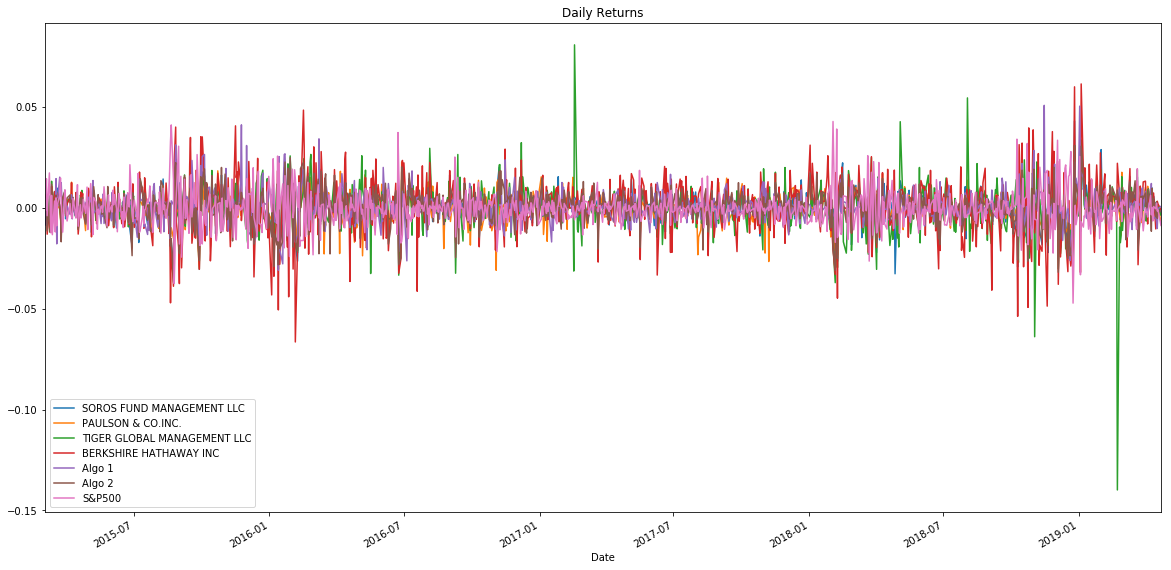

In [17]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(20,10),title= "Daily Returns")


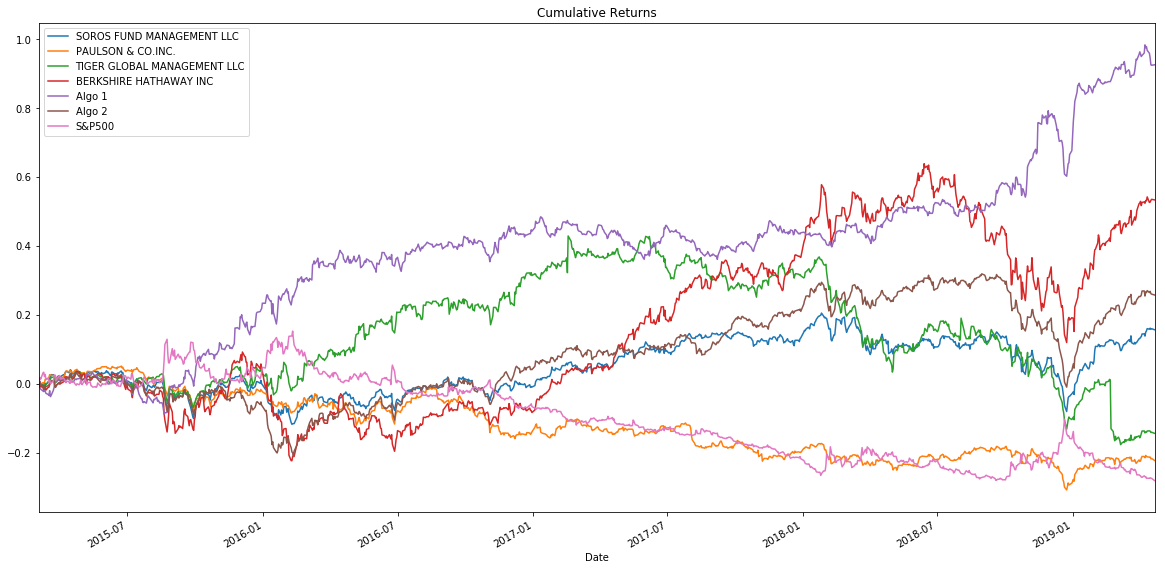

In [18]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod()-1
cumulative_returns.plot(figsize=(20,10),title= "Cumulative Returns")

In [19]:
cumulative_returns.tail(1)

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-22                    0.15628           -0.223061   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-22                    -0.144348                0.533046  0.925124   

              Algo 2    S&P500  
Date                            
2019-04-22  0.257151 -0.281524

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

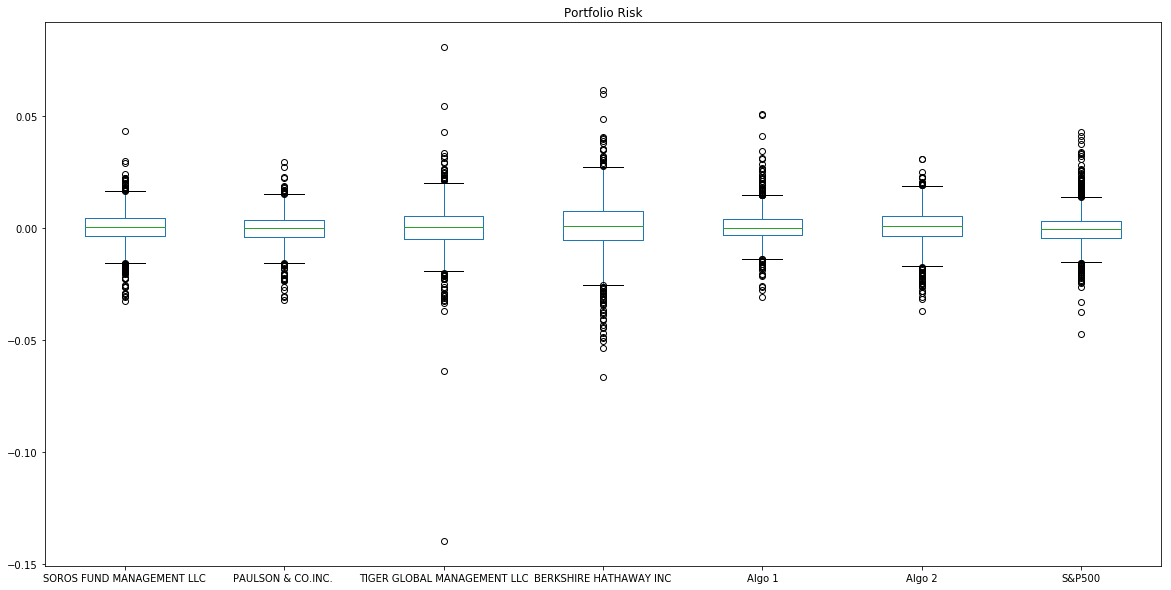

In [20]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot.box(figsize=(20,10), title="Portfolio Risk")

In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_std = combined_df.std()
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P500                         0.008587
dtype: float64

In [22]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
riskier_portfolio = combined_df["S&P500"].std()
combined_df.std() > riskier_portfolio

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

In [23]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annual_std = daily_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P500                         0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

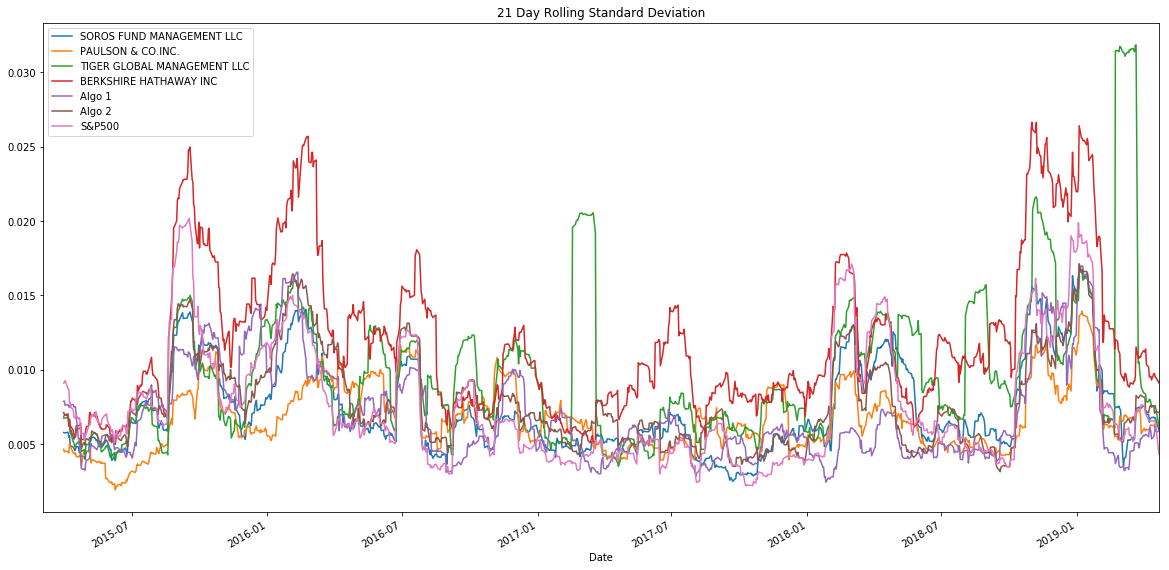

In [24]:
combined_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

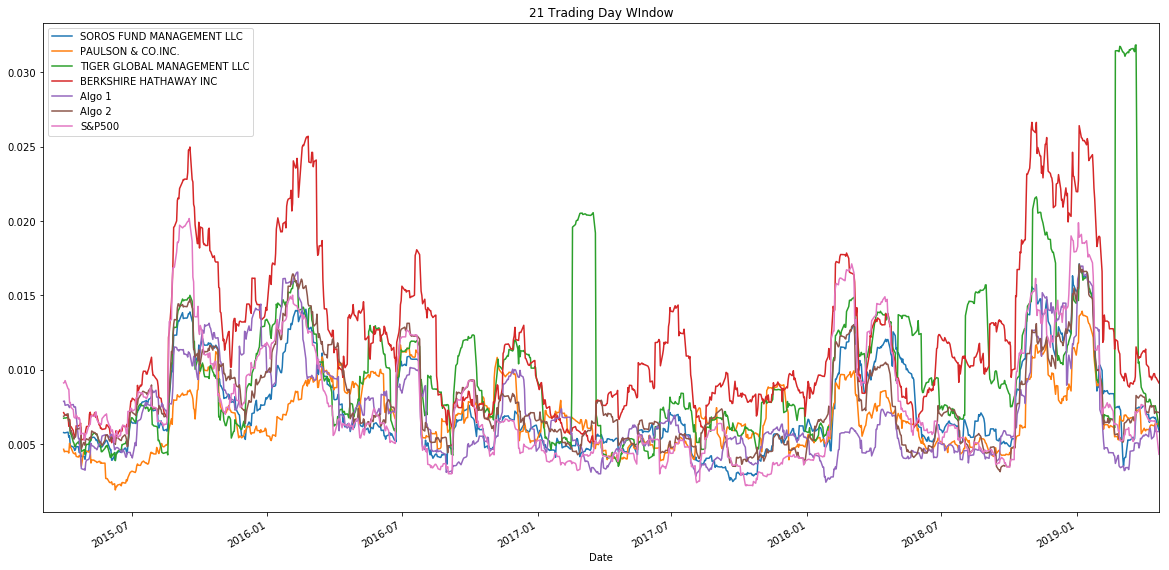

In [25]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Trading Day WIndow")


In [26]:
# Construct a correlation table
# YOUR CODE HERE
corr_table = combined_df.corr()
corr_table

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
Algo 1                                        0.320901            0.268631   
Algo 2                                        0.826730            0.678085   
S&P500                                        0.000574            0.013549   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424125   
Algo 1                                          0.164114   
Algo 2                                          0.507160   
S&P500                                         -0.001505   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754157  0.320901  0.826730   
PAULSON & CO.INC.                          0.545451  0.268631  0.678085   
TIGER GLOBAL MANAGEMENT LLC                0.424125  0.164114  0.507160   
BERKSHIRE HATHAWAY INC                     1.000000  0.291678  0.687756   
Algo 1                                     0.291678  1.000000  0.287852   
Algo 2                                     0.687756  0.287852  1.000000   
S&P500                                    -0.013856 -0.033963 -0.002192   

                               S&P500  
SOROS FUND MANAGEMENT LLC    0.000574  
PAULSON & CO.INC.            0.013549  
TIGER GLOBAL MANAGEMENT LLC -0.001505  
BERKSHIRE HATHAWAY INC      -0.013856  
Algo 1                      -0.033963  
Algo 2                      -0.002192  
S&P500                       1.000000

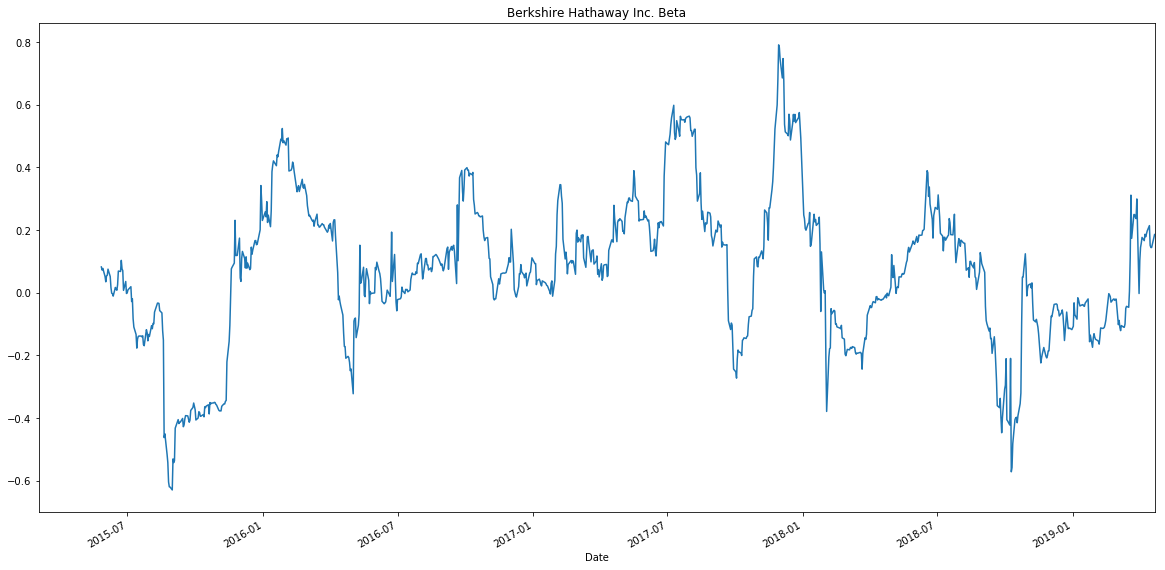

In [27]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
Berk_Hath = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df["S&P500"])
sp_port = combined_df['S&P500'].rolling(window=60).var()
beta = Berk_Hath / sp_port
beta.plot(figsize=(20,10), title='Berkshire Hathaway Inc. Beta')

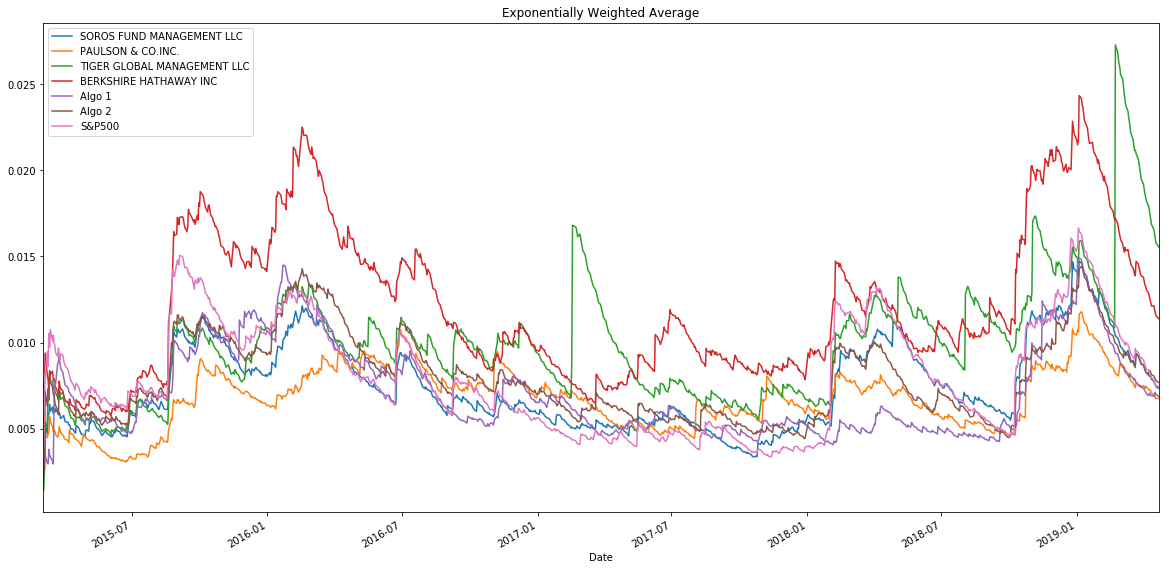

In [28]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
combined_df.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [29]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
dtype: float64

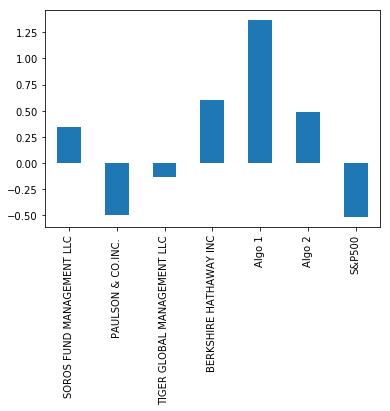

In [30]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio.plot(kind="bar")


On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: 
Yes, Algo 1 out performs both market and the whales

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [68]:
import numpy as np
import datetime as dt
from pathlib import Path
import hvplot.pandas


In [53]:
# Read the first stock
# YOUR CODE HERE
amazon_csv = Path("amzn_data.csv")
# YOUR CODE HERE
amazon = pd.read_csv(amazon_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
#amazon.rename(columns= {'Close': 'Amazon'},inplace=True)
amazon["Symbol"] = "Amazon"
amazon.head()

Close  Symbol
Trade DATE                         
2015-03-03 16:00:00  384.61  Amazon
2015-03-04 16:00:00  382.72  Amazon
2015-03-05 16:00:00  387.83  Amazon
2015-03-06 16:00:00  380.09  Amazon
2015-03-09 16:00:00  378.56  Amazon

In [54]:
# Read the second stock
tsla_csv = Path("tsla_data.csv")
# YOUR CODE HERE
tsla = pd.read_csv(tsla_csv, infer_datetime_format=True)
tsla = pd.read_csv(tsla_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
#yahoo.rename(columns= {'Close': 'Yahoo'},inplace=True)
tsla["Symbol"] = "TESLA"
tsla.head()

Close Symbol
Trade DATE                       
2015-03-03 16:00:00  39.91  TESLA
2015-03-04 16:00:00  40.49  TESLA
2015-03-05 16:00:00  40.13  TESLA
2015-03-06 16:00:00  38.78  TESLA
2015-03-09 16:00:00  38.18  TESLA

In [55]:
# Read the third stock
intu_csv = Path("intu_data.csv")
# YOUR CODE HERE
intuit = pd.read_csv(intu_csv, infer_datetime_format=True)
intuit = pd.read_csv(intu_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
intuit["Symbol"] = "Intuit"
# intuit.rename(columns= {'Close': 'Intuit'},inplace=True)
intuit.head()

Close  Symbol
Trade DATE                        
2015-03-03 16:00:00  98.00  Intuit
2015-03-04 16:00:00  97.45  Intuit
2015-03-05 16:00:00  98.12  Intuit
2015-03-06 16:00:00  97.41  Intuit
2015-03-09 16:00:00  97.65  Intuit

In [56]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
custom_df = pd.concat([amazon,tsla,intuit], axis='rows', join='inner')
custom_df = custom_df.reset_index()
custom_df = custom_df.pivot_table(values="Close", index="Trade DATE", columns="Symbol")
custom_df.head()

Symbol               Amazon  Intuit  TESLA
Trade DATE                                
2015-03-03 16:00:00  384.61   98.00  39.91
2015-03-04 16:00:00  382.72   97.45  40.49
2015-03-05 16:00:00  387.83   98.12  40.13
2015-03-06 16:00:00  380.09   97.41  38.78
2015-03-09 16:00:00  378.56   97.65  38.18

In [57]:
# Reset the index
# YOUR CODE HERE
custom_df.reset_index()
custom_df.head()

Symbol               Amazon  Intuit  TESLA
Trade DATE                                
2015-03-03 16:00:00  384.61   98.00  39.91
2015-03-04 16:00:00  382.72   97.45  40.49
2015-03-05 16:00:00  387.83   98.12  40.13
2015-03-06 16:00:00  380.09   97.41  38.78
2015-03-09 16:00:00  378.56   97.65  38.18

In [58]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
custom_df = custom_df.pivot_table(index='Trade DATE')
custom_df.head()

Symbol               Amazon  Intuit  TESLA
Trade DATE                                
2015-03-03 16:00:00  384.61   98.00  39.91
2015-03-04 16:00:00  382.72   97.45  40.49
2015-03-05 16:00:00  387.83   98.12  40.13
2015-03-06 16:00:00  380.09   97.41  38.78
2015-03-09 16:00:00  378.56   97.65  38.18

In [59]:
# Calculate daily returns for each stock
custom_df = custom_df.pct_change()
custom_df.head()

Symbol                 Amazon    Intuit     TESLA
Trade DATE                                       
2015-03-03 16:00:00       NaN       NaN       NaN
2015-03-04 16:00:00 -0.004914 -0.005612  0.014533
2015-03-05 16:00:00  0.013352  0.006875 -0.008891
2015-03-06 16:00:00 -0.019957 -0.007236 -0.033641
2015-03-09 16:00:00 -0.004025  0.002464 -0.015472

In [60]:
# Count nulls
custom_df.isnull().sum()

Symbol
Amazon    1
Intuit    1
TESLA     1
dtype: int64

In [61]:
# Drop Nulls
# YOUR CODE HERE
custom_df.dropna(inplace=True)
custom_df.head()

Symbol                 Amazon    Intuit     TESLA
Trade DATE                                       
2015-03-04 16:00:00 -0.004914 -0.005612  0.014533
2015-03-05 16:00:00  0.013352  0.006875 -0.008891
2015-03-06 16:00:00 -0.019957 -0.007236 -0.033641
2015-03-09 16:00:00 -0.004025  0.002464 -0.015472
2015-03-10 16:00:00 -0.023906 -0.023144 -0.003143

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [62]:
# Calculate weighted portfolio returns
weights = [1/3,1/3,1/3]
# YOUR CODE HERE
custom_portfolio_returns= custom_df.dot(weights) 
custom_portfolio_returns.head()

Trade DATE
2015-03-04 16:00:00    0.001335
2015-03-05 16:00:00    0.003779
2015-03-06 16:00:00   -0.020278
2015-03-09 16:00:00   -0.005678
2015-03-10 16:00:00   -0.016731
dtype: float64

In [63]:
combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2    S&P500  
Date                            
2015-03-03 -0.000949  0.004408  
2015-03-04  0.002416 -0.001195  
2015-03-05  0.004323  0.014378  
2015-03-06 -0.011460 -0.003929  
2015-03-09  0.001303  0.017254

In [64]:
custom_df.head()

Symbol                 Amazon    Intuit     TESLA
Trade DATE                                       
2015-03-04 16:00:00 -0.004914 -0.005612  0.014533
2015-03-05 16:00:00  0.013352  0.006875 -0.008891
2015-03-06 16:00:00 -0.019957 -0.007236 -0.033641
2015-03-09 16:00:00 -0.004025  0.002464 -0.015472
2015-03-10 16:00:00 -0.023906 -0.023144 -0.003143

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [96]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
combined_df_new = pd.concat([combined_df, custom_df], ignore_index=True, sort=False)

combined_df_new.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
0                  -0.001266           -0.004981                    -0.000496   
1                   0.002230            0.003241                    -0.002534   
2                   0.004016            0.004076                     0.002355   
3                  -0.007905           -0.003574                    -0.008481   
4                   0.000582            0.004225                     0.005843   

   BERKSHIRE HATHAWAY INC    Algo 1    Algo 2    S&P500  Amazon  Intuit  TESLA  
0               -0.006569 -0.001942 -0.000949  0.004408     NaN     NaN    NaN  
1                0.004213 -0.008589  0.002416 -0.001195     NaN     NaN    NaN  
2                0.006726 -0.000955  0.004323  0.014378     NaN     NaN    NaN  
3               -0.013098 -0.004957 -0.011460 -0.003929     NaN     NaN    NaN  
4               -0.001652 -0.005447  0.001303  0.017254     NaN     NaN    NaN

In [97]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_df_new.dropna(inplace=False)
combined_df_new.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
0                  -0.001266           -0.004981                    -0.000496   
1                   0.002230            0.003241                    -0.002534   
2                   0.004016            0.004076                     0.002355   
3                  -0.007905           -0.003574                    -0.008481   
4                   0.000582            0.004225                     0.005843   

   BERKSHIRE HATHAWAY INC    Algo 1    Algo 2    S&P500  Amazon  Intuit  TESLA  
0               -0.006569 -0.001942 -0.000949  0.004408     NaN     NaN    NaN  
1                0.004213 -0.008589  0.002416 -0.001195     NaN     NaN    NaN  
2                0.006726 -0.000955  0.004323  0.014378     NaN     NaN    NaN  
3               -0.013098 -0.004957 -0.011460 -0.003929     NaN     NaN    NaN  
4               -0.001652 -0.005447  0.001303  0.017254     NaN     NaN    NaN

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [98]:
# Risk
# YOUR CODE HERE
daily_std = combined_df_new.std() * np.sqrt(252)
daily_std.sort_values(ascending = False)

TESLA                          0.444417
Amazon                         0.299164
Intuit                         0.233095
BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P500                         0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

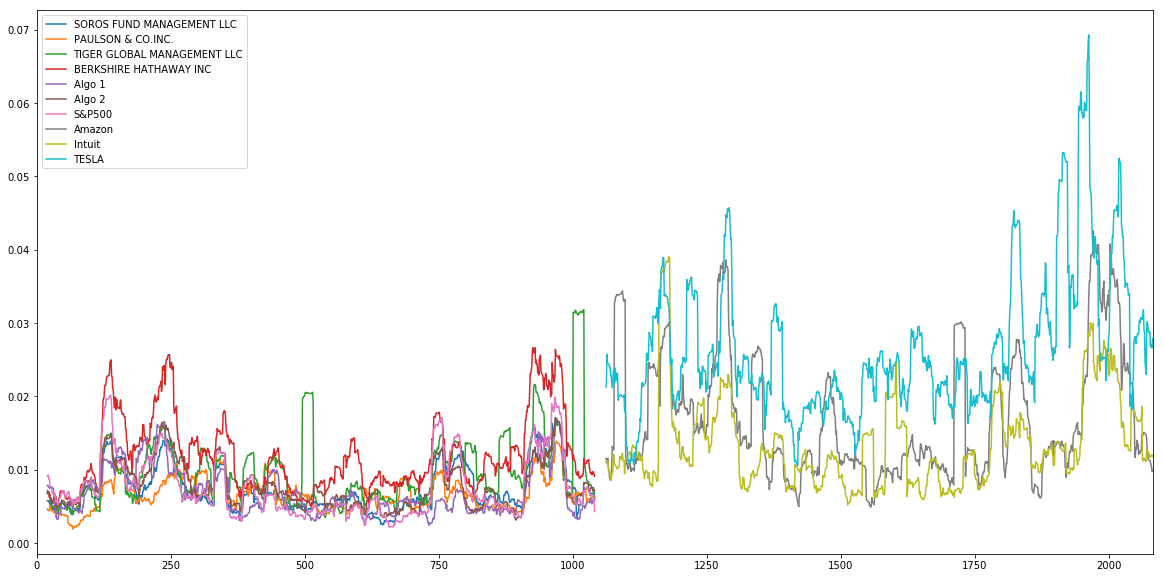

In [99]:
# Rolling
# YOUR CODE HERE
combined_df_new.rolling(window=21).std().plot(figsize = (20, 10))

In [100]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio2 = (combined_df_new.mean() * 252) / (combined_df_new.std() * np.sqrt(252))
sharpe_ratio2

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                        -0.518582
Amazon                         1.436082
Intuit                         1.137247
TESLA                          0.371250
dtype: float64

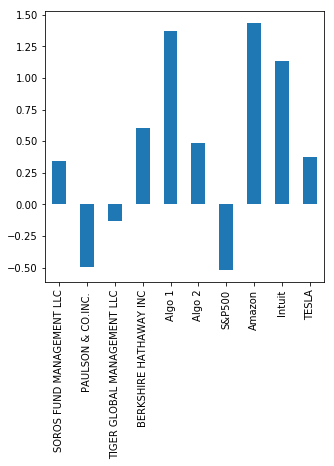

In [101]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio2.plot.bar(figsize=(5,5))

In [102]:
# Create a correlation analysis
# YOUR CODE HERE
corr_table = combined_df_new.corr()
corr_table

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699823   
PAULSON & CO.INC.                             0.699823            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561040            0.434308   
BERKSHIRE HATHAWAY INC                        0.754157            0.545451   
Algo 1                                        0.320901            0.268631   
Algo 2                                        0.826730            0.678085   
S&P500                                        0.000574            0.013549   
Amazon                                             NaN                 NaN   
Intuit                                             NaN                 NaN   
TESLA                                              NaN                 NaN   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561040   
PAULSON & CO.INC.                               0.434308   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424125   
Algo 1                                          0.164114   
Algo 2                                          0.507160   
S&P500                                         -0.001505   
Amazon                                               NaN   
Intuit                                               NaN   
TESLA                                                NaN   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754157  0.320901  0.826730   
PAULSON & CO.INC.                          0.545451  0.268631  0.678085   
TIGER GLOBAL MANAGEMENT LLC                0.424125  0.164114  0.507160   
BERKSHIRE HATHAWAY INC                     1.000000  0.291678  0.687756   
Algo 1                                     0.291678  1.000000  0.287852   
Algo 2                                     0.687756  0.287852  1.000000   
S&P500                                    -0.013856 -0.033963 -0.002192   
Amazon                                          NaN       NaN       NaN   
Intuit                                          NaN       NaN       NaN   
TESLA                                           NaN       NaN       NaN   

                               S&P500    Amazon    Intuit     TESLA  
SOROS FUND MANAGEMENT LLC    0.000574       NaN       NaN       NaN  
PAULSON & CO.INC.            0.013549       NaN       NaN       NaN  
TIGER GLOBAL MANAGEMENT LLC -0.001505       NaN       NaN       NaN  
BERKSHIRE HATHAWAY INC      -0.013856       NaN       NaN       NaN  
Algo 1                      -0.033963       NaN       NaN       NaN  
Algo 2                      -0.002192       NaN       NaN       NaN  
S&P500                       1.000000       NaN       NaN       NaN  
Amazon                            NaN  1.000000  0.508215  0.318624  
Intuit                            NaN  0.508215  1.000000  0.290722  
TESLA                             NaN  0.318624  0.290722  1.000000

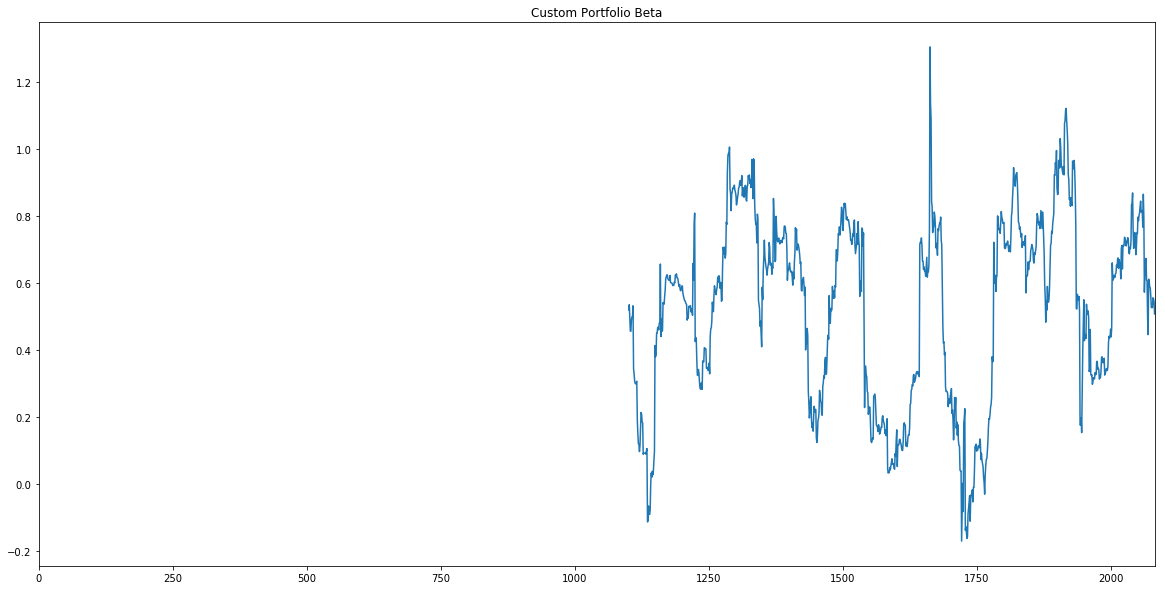

In [108]:
# Beta
# YOUR CODE HERE
covariance_all = combined_df_new["TESLA"].rolling(window=60).cov(combined_df_new["Intuit"])
variance_intuit = combined_df_new['Intuit'].rolling(window=60).var()
all_portfolio_beta = covariance_all / variance_intuit
all_portfolio_beta.plot(figsize=(20,10), title="Custom Portfolio Beta")